In [1]:
import yaml
import torch

from roadvision3d.src.engine.model_builder import build_model
from roadvision3d.src.engine.model_saver import load_checkpoint
from roadvision3d.tools.inference import inference, process_image
from roadvision3d.src.datasets.object_3d import Calibration
from roadvision3d.visualization import Visualizer

from roadvision3d.src.datasets.kitti import KITTI

from roadvision3d.visualization import Visualizer_dataloader

from PIL import Image
import numpy as np
import os



%load_ext autoreload
%autoreload 2

In [2]:
config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/SMOKE_KITTI_EXP.yaml'
# config_path = '/home/javier/pytorch/RoadVision3D/roadvision3d/configs/MonoLSS_KITTI_EXP.yaml'

# load config
assert (os.path.exists(config_path))
cfg = yaml.load(open(config_path, 'r'), Loader=yaml.Loader)

# build dataloader or load de data manually
dataset = KITTI(split='trainval', cfg=cfg['dataset'])

In [5]:
item = 8
inputs, calib, coord_range, targets, info = dataset.__getitem__(item)

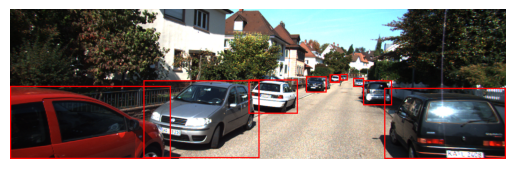

In [7]:
visualizer_labels = Visualizer(calib=calib, pitch=0)

img_file = dataset.get_image(item)
labels_file = dataset.get_label(item)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer_labels.draw_2d_bboxes(img_file, labels_file, color='red', width=3, display=True)
# Draw 3D bounding boxes on the image
# image_with_3d = visualizer_labels.draw_3d_bboxes(img_file, labels_file, color='blue', color_front='green', width=4, display=True)

In [10]:

checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/SMOKE_KITTI_EXP/logs/checkpoints/checkpoint_epoch_150.pth'
# checkpoint_path = '/home/javier/pytorch/RoadVision3D/work_dirs/Monolss_KITTI_EXP/logs/checkpoints/checkpoint_epoch_150.pth'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = build_model(cfg, device)
load_checkpoint(model = model,
                optimizer = None,
                filename = checkpoint_path,
                map_location=device)

150

In [11]:
img_path = '/home/javier/datasets/kitti/training/image_2/%06d.png' % item
calib_file = '/home/javier/datasets/kitti/training/calib/%06d.txt' % item

img_tensor, coord = process_image(img_path, cfg)
calib = Calibration.from_kitti_calib_file(calib_file)


results = inference(img_tensor, calib, model, cfg, device, coord)

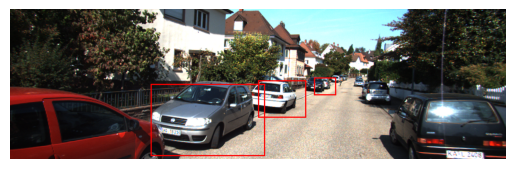

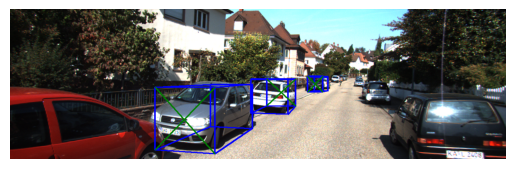

In [12]:
visualizer = Visualizer(calib=calib, pitch=0)

img_file = Image.open(img_path)

# Draw 2D bounding boxes on the image
image_with_2d = visualizer.draw_2d_bboxes(img_file, results, color='red', width=3, display=True)

# Draw 3D bounding boxes on the image
image_with_3d = visualizer.draw_3d_bboxes(img_file, results, color='blue', color_front='green', width=4, display=True)